### Baseline

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
%matplotlib inline

In [5]:
df = pd.read_csv('df_clean.csv')

#### One hot encoding categorical variables

In [6]:
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

#### Set target variable

In [7]:
y = df_encoded['Y'].copy()
X = df_encoded.drop('Y', axis =1 ).copy()

#### Scale the data

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [9]:
X.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

#### Train the models: Logistic regression, Support vector machine, and Neural network.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [12]:
models = {
    LogisticRegression(): "Logistic Regression",
    SVC(): "Support Vector Machine",
    MLPClassifier(): "Neural Network"
}

for model in models.keys():
    model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


#### Evaluate the models: confusion matrix, AUC-ROC, F-1 Score.

In [13]:
for model, name in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test)*100))

Logistic Regression: 81.59%
Support Vector Machine: 81.92%
Neural Network: 80.93%


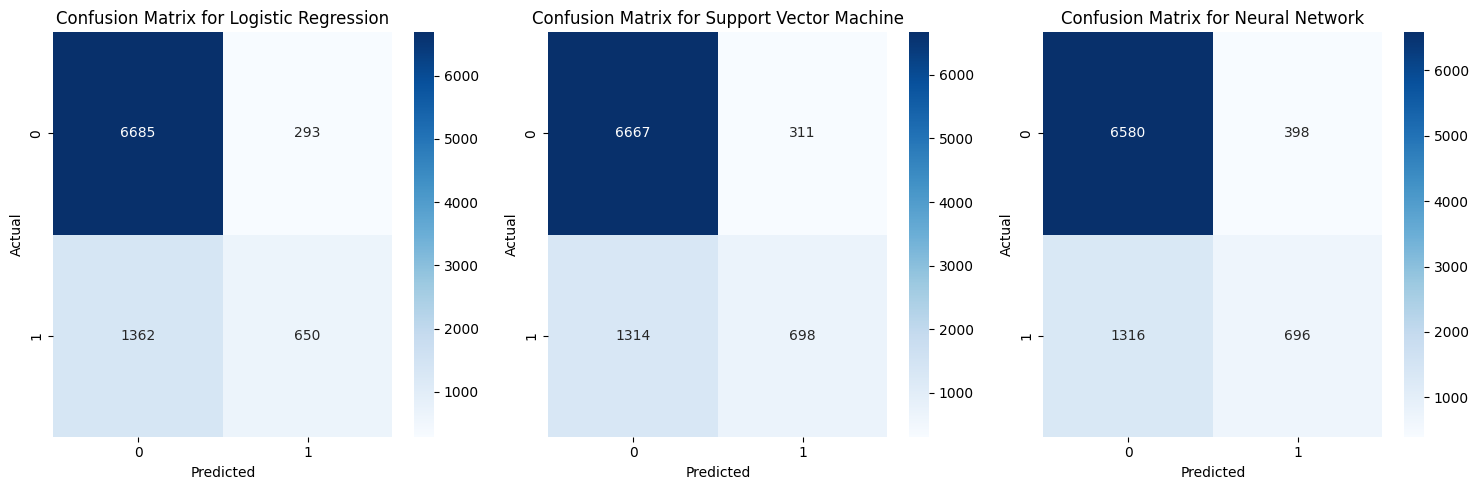

In [39]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (model, name) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

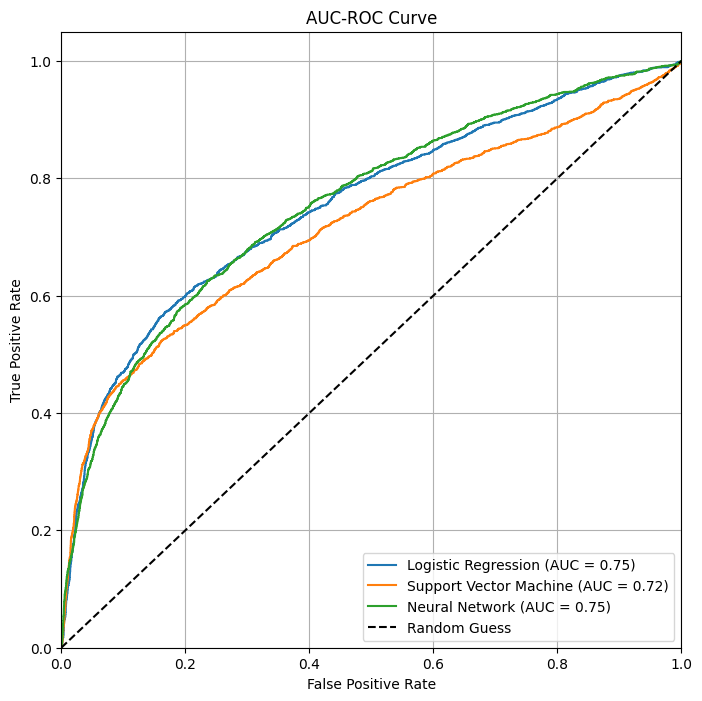

In [41]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 8))

for model, name in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Recall: true positive. sensitivity. "Of all actual positives, how many were accurately identified?"

Precision: "Of all predicted positives, how many are actual positives?"

In credit default prediction, false negative is more costly given the nature of the business context. Therefore, measuring high recall is crucial. F-1 score measures both recall and precision, so it could be an efficient metric.

In [42]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

for model, name in models.items():
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"  Recall: {recall:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  F1 Score: {f1:.2f}")
    print()

Logistic Regression:
  Recall: 0.32
  Precision: 0.69
  Accuracy: 0.82
  F1 Score: 0.44

Support Vector Machine:
  Recall: 0.35
  Precision: 0.69
  Accuracy: 0.82
  F1 Score: 0.46

Neural Network:
  Recall: 0.35
  Precision: 0.64
  Accuracy: 0.81
  F1 Score: 0.45

